<a href="https://colab.research.google.com/github/shivamishu/cmpe255/blob/main/Shivam_Dimensionality_Reduction_Techniques_on_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab to demonstrate various dimensionality reduction techniques(Tabular Data) 


i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP



 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Loading the dataset

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#PCA

In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X)

In [ ]:
covariance_matrix = np.cov(transformed_df.T)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigenvalues arranged in descending order:
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [ ]:
pca = PCA()


In [ ]:
pca = pca.fit(transformed_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_

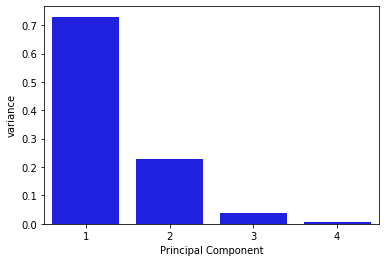

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(4)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

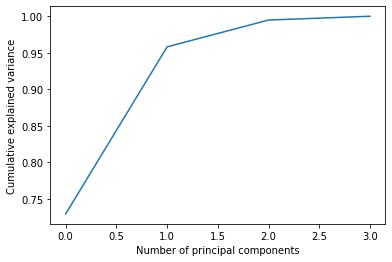

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =4)
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X)

## Below Plot clearly distributes the data

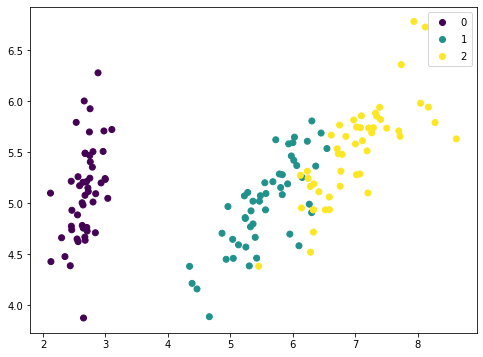

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=y)
plt.legend(*scatter.legend_elements())

#SVD

In [ ]:
u, s, v = np.linalg.svd(X, full_matrices=True)

In [ ]:
u.shape


(150, 150)

In [ ]:
s.shape

(4,)

In [ ]:
v.shape

(4, 4)

Text(0, 0.5, 'Percent of the variance explained')

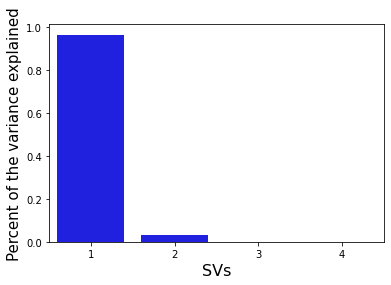

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.061617,0.129611
1,0,-0.058071,0.111020
2,0,-0.056763,0.117966
3,0,-0.056653,0.105308
4,0,-0.061230,0.131090



After applied dimensionality reduction, graph is clearly plotting the data distribution

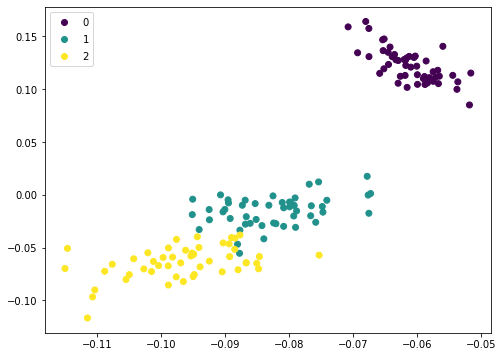

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

#TSNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.144745
[t-SNE] KL divergence after 300 iterations: 2.150634


Projection of data is not clear with TSNE

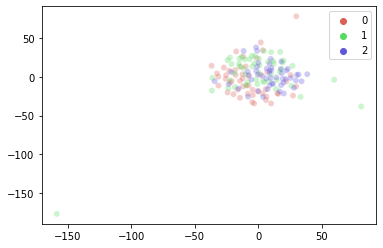

In [ ]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=X,
    legend="full",
    alpha=0.3
)


#ISOMAP

In [ ]:
from sklearn import manifold, datasets

In [ ]:
iris = datasets.load_iris()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)

In [ ]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

,X,Y,label
0,0.118155,0.381038,0
1,0.113729,0.323243,0
2,0.113922,0.325955,0
3,0.113904,0.325207,0
4,0.117613,0.372992,0


This Technique is also distrubuted the data but not good with all features

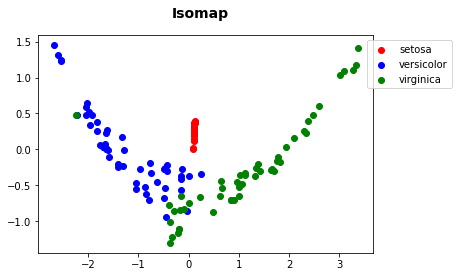

In [ ]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

#LLE

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)

In [ ]:
X_transformed = embedding.fit_transform(X)

Data distribution not clearly with LLE technique

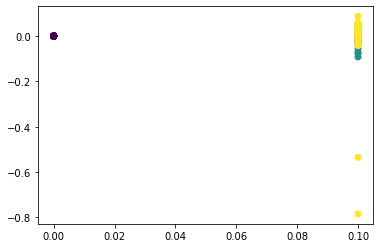

In [ ]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

#UMAP

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 34.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=477f4f45b072cebf558a2a96770b45aec4d40e19a218c076029407cea6cd7d99
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=f4824d65facb7d36e168cf3c759f2d42b580168f9ff27109eef1b205945c57ba
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:

import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 7.862407922744751 seconds


In [ ]:
mapper = umap.UMAP().fit(X)

In [ ]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot


     |████████████████████████████████| 15.8 MB 633 bytes/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 125 kB 60.5 MB/s 
     |████████████████████████████████| 791 kB 57.4 MB/s 
     |████████████████████████████████| 786 kB 52.8 MB/s 
     |████████████████████████████████| 779 kB 68.5 MB/s 
     |████████████████████████████████| 778 kB 46.8 MB/s 
     |████████████████████████████████| 776 kB 50.0 MB/s 
     |████████████████████████████████| 769 kB 56.2 MB/s 
     |████████████████████████████████| 766 kB 53.8 MB/s 
     |████████████████████████████████| 1.0 MB 35.4 MB/s 
     |████████████████████████████████| 722 kB 57.7 MB/s 
     |████████████████████████████████| 722 kB 21.5 MB/s 
     |████████████████████████████████| 715 kB 58.1 MB/s 
     |████████████████████████████████| 705 kB 56.6 MB/s 
     |████████████████████████████████| 699 kB 57.2 MB/s 
     |████████████████████████████████| 696 kB 73.2 MB/s 
     |███████

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


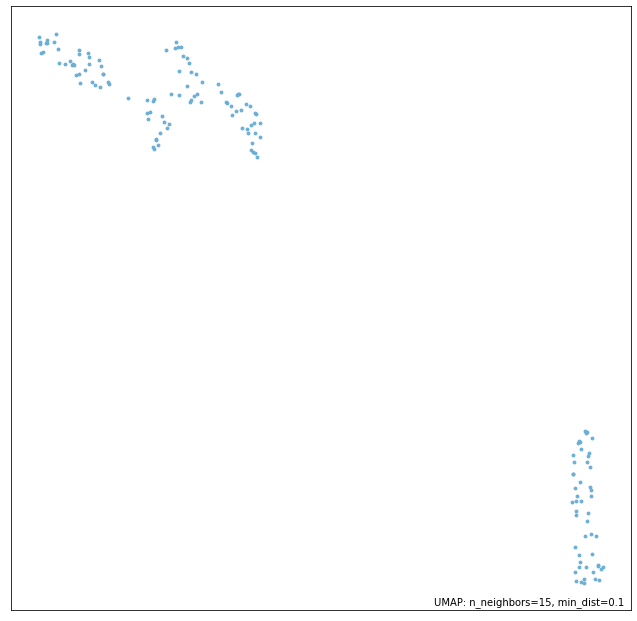

In [ ]:
umap.plot.points(mapper)


## Data projection is clear

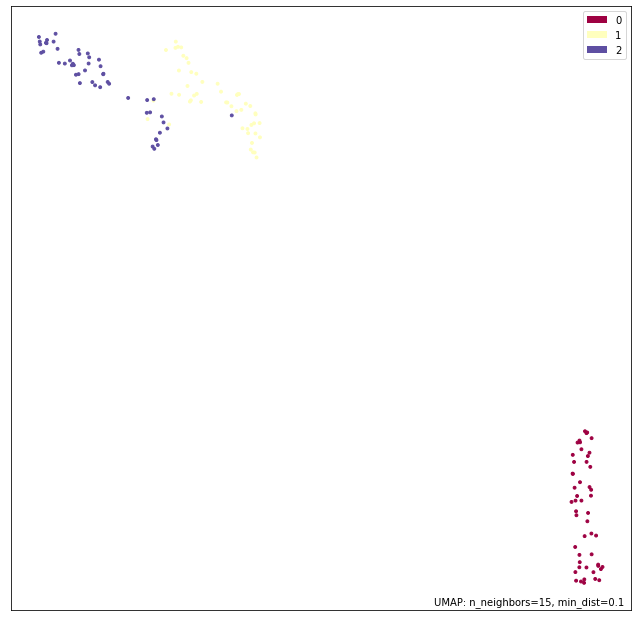

In [ ]:
umap.plot.points(mapper, labels=y)

## Conclusion

Out of all the Dimensionality Reduction techniques, it has been noted that PCA, SVD, ISOMAP, UMAP projects the data clearly, however, LLE and TSNE did do well with tabular data.